In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc

from sklearn.cluster import DBSCAN 

In [3]:
df = pd.read_csv('data/customers.csv')
df = df.drop('cluster',axis=1)
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


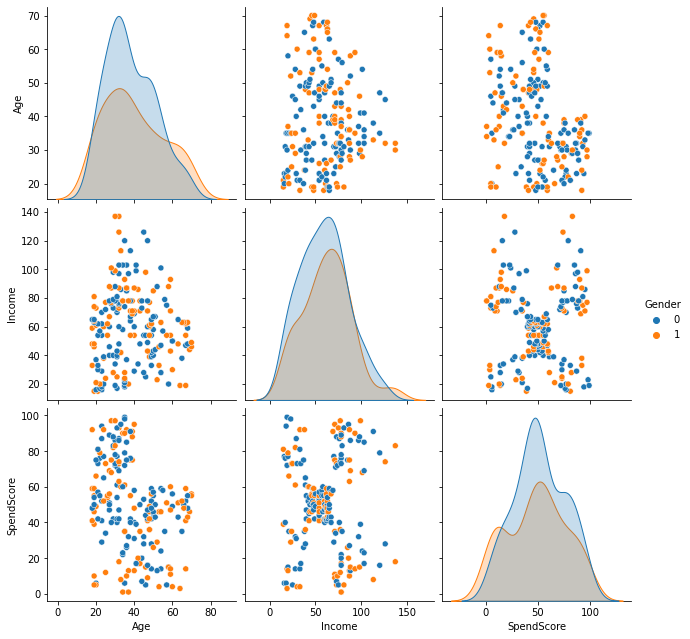

In [8]:
dfs = df[['Gender','Age','Income','SpendScore']]
sns.pairplot(dfs,hue="Gender",height=3);
plt.show()

### Age - Income 

Noisy samples are given the label -1

In [121]:
age_income = df [['Age','Income']]
db1 = DBSCAN(eps=5.5,min_samples=3,metric='euclidean').fit(age_income)
age_income.insert(2, "label", db1.labels_)
age_income.insert(3, "Gender", df[['Gender']])
db1.labels_

array([ 0,  0,  0,  0,  1,  0,  1,  0, -1,  1, -1,  1, -1,  0,  1,  0,  1,
        0,  2,  1,  1,  0,  1,  1,  2,  1,  1,  1,  1,  0, -1,  0,  2,  0,
        2,  0,  1,  0,  0,  0, -1,  0,  3,  0,  3,  0,  3,  0,  0,  0,  3,
        0,  0, -1,  3,  3,  3,  4,  0,  3,  4,  5,  4,  3,  4,  5,  4,  4,
        5,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  4,  4,
        4,  4,  4,  4,  4,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        6,  4,  4,  4,  6,  4,  6,  6,  6,  4,  4,  4,  4,  4,  6,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  7,  4, -1,  4, -1,  4,  4,  4,  4,  4,
        4,  4,  4,  4, -1,  4, -1,  4, -1,  8,  8,  8,  8,  8,  8,  8, -1,
        8,  8,  8,  8,  8, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

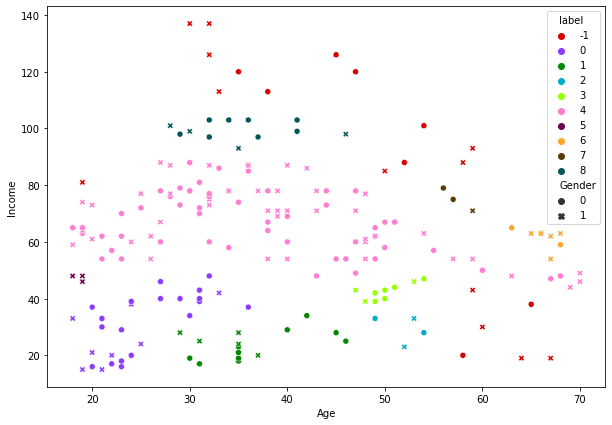

In [122]:
cluster=pd.unique(age_income['label']).size

palette = sns.color_palette(cc.glasbey, n_colors=cluster)

plt.figure(figsize=(10,7))
sns.scatterplot(data=age_income,x='Age',y='Income',hue='label',style='Gender',palette=palette)
plt.show()

### SpendScore - Income

In [118]:
spsc_income = df[['SpendScore','Income']]
db2 = DBSCAN(eps=6,min_samples=3).fit(spsc_income)
spsc_income.insert(2, "label", db2.labels_)
spsc_income.insert(3, "Gender", df[['Gender']])
db2.labels_

array([-1,  0,  1,  0, -1,  0,  1,  3,  1,  0,  2,  3,  2,  0,  2,  0,  4,
       -1,  4,  3,  4,  0,  6,  0,  7,  5,  4, -1,  4,  5,  6,  0,  6, -1,
        7,  5,  7,  0, -1,  0, -1, -1, -1,  8, -1,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9, 11,  9, 11,  9, 10,  9, 10,  9, 11,  9, 10,  9,
       10,  9, 10,  9, 10,  9, 11,  9, 10,  9, 11,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 11,  9, 10,  9, -1, -1, 12,  9, -1, -1,
       12, -1, 12,  9, 12, -1, 12, -1, 12, 13, -1, 13, 12, 13, -1, -1, 12,
       -1, 12, 13, 12, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

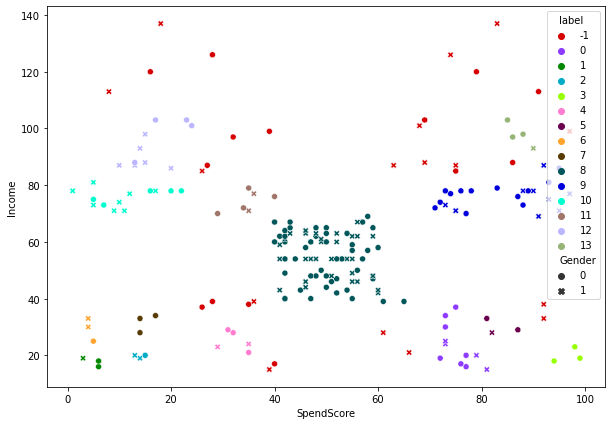

In [119]:
cluster=pd.unique(spsc_income['label']).size

palette = sns.color_palette(cc.glasbey, n_colors=cluster)

plt.figure(figsize=(10,7))
sns.scatterplot(data=spsc_income,x='SpendScore',y='Income',hue='label',style='Gender',palette=palette)
plt.show()

### Age - SpendScore

In [116]:
age_spsc = df[['Age','SpendScore']]
db3 = DBSCAN(eps=5.5,min_samples=3,metric='euclidean').fit(age_spsc)
age_spsc.insert(2, "label", db3.labels_)
age_spsc.insert(3, "Gender", df[['Gender']])
db3.labels_

array([ 0,  1,  2,  1,  0,  1,  3,  1,  6,  1, -1,  1,  3,  1,  3,  1,  4,
        1,  4,  1,  4,  1,  3,  1,  3,  1,  4,  5,  4,  1,  6,  1,  6,  1,
        3,  1,  3,  1,  4,  1, -1,  1,  4,  5,  4,  1,  4,  0,  0,  0,  4,
        5,  0,  4,  4,  4,  4,  4,  0,  4,  4,  0,  4,  4,  4,  0,  4,  4,
        0,  0,  4,  4,  4,  4,  4,  0,  4,  4,  0,  4,  4, -1,  4,  4,  0,
        4,  4,  0,  5,  4,  4,  0,  4,  4,  0,  0,  4,  0,  4,  0,  0,  4,
        4,  0,  4,  0,  4,  4,  4,  4,  4,  0,  4,  0,  0,  0,  4,  4,  4,
        4,  0,  4, -1,  1, -1,  1,  4,  1,  3,  1,  3,  1, -1,  1,  2,  1,
        3,  1,  2,  1,  6,  1,  0,  1, -1,  1,  4,  1,  4,  1,  3,  1,  3,
        1,  3,  1,  3,  1,  3,  1, -1,  1,  2,  1,  4,  1,  3,  1,  4,  5,
        3,  1,  3,  1,  3,  1,  3,  1,  3,  1,  4,  1,  3,  1,  4,  1,  4,
        1,  3,  1,  4,  1,  3,  1,  3,  1,  4,  1,  4,  1], dtype=int64)

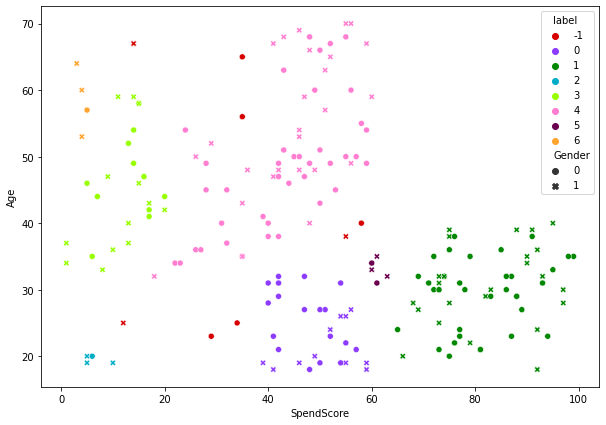

In [117]:
cluster=pd.unique(age_spsc['label']).size

palette = sns.color_palette(cc.glasbey, n_colors=cluster)

plt.figure(figsize=(10,7))
sns.scatterplot(data=age_spsc,x='SpendScore',y='Age',hue='label',style='Gender', palette=palette)
plt.show()